In some auditory experiments we use a cheap microphone that's about the size of a pinhead to record the signal. Although it's cheap, it has some advantages over other microphones. First, it is very compact (allowing us to place it right next to the animal's ear). Second, if we break it we are out only \$50 as opposed to \$5,000. However, because it's cheap we need to calibrate it against a high-quality microphone.

One way to calibrate the cheap microphone is to play a signal through the speaker and record it simultaneously with both microphones. We use a signal known as a chirp. This signal contains a broad range of frequencies (allowing us to assess the microphone's response as a function of frequency). The provided Numpy file is the response of both microphones to 256 repetitions of the chirp stimulus. The chirp is approximately 20 msec long and we have sampled the response at 200 kHz. This gives us 4000 timepoints. The file can be loaded as follows:

In [3]:
import numpy as np
waveforms = np.load('microphone_data.npy')

This will load a single 3-dimensional array of shape 256, 2, 4000. The first dimension is the repetition. The second dimension is the microphone . The third dimension is time. Note:

    waveforms[:, 0, :] #is the data for the cheap microphone
    waveforms[:, 1, :] #is the data for the expensive microphone

Problem 1: Let's take a look at what a single waveform from each microphone looks like. Using Matplotlib and array indexing, plot the first waveform from each microphone. Once you have done that, take a look at the waveforms. Note that the expensive microphone has a very noisy waveform (this is because it's not very sensitive, so it only responds at high stimulus levels).

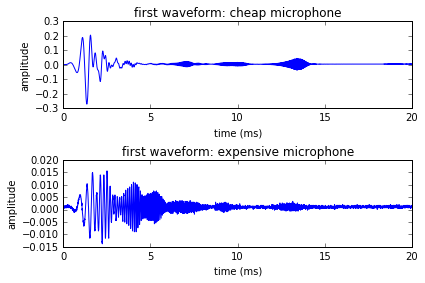

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

repetitions, microphones, samples = waveforms.shape
fs = 200 #sampling rate (kHz)
time = [float(x)/fs for x in range(samples)]

plt.subplot(2,1,1)
plt.plot(time, waveforms[1,0,:])
plt.title('first waveform: cheap microphone')
plt.ylabel('amplitude')
plt.xlabel('time (ms)')
plt.subplot(2,1,2)
plt.plot(time, waveforms[1,1,:])
plt.title('first waveform: expensive microphone')
plt.ylabel('amplitude')
plt.xlabel('time (ms)')
plt.tight_layout()

Problem 2: Perhaps if we average together all 256 repetitions, we'll get a much cleaner waveform for each microphone. Using Numpy, average together the repetitions and plot them using Matplotlib. Note how averaging really cleans up the quality of the waveform for the expensive microphone.

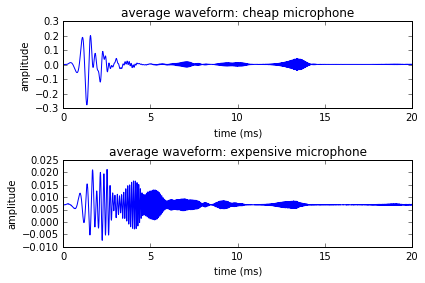

In [5]:
avg_waveforms = waveforms.mean(0)

plt.subplot(2,1,1)
plt.plot(time, avg_waveforms[0,:])
plt.title('average waveform: cheap microphone')
plt.ylabel('amplitude')
plt.xlabel('time (ms)')
plt.subplot(2,1,2)
plt.plot(time, avg_waveforms[1,:])
plt.title('average waveform: expensive microphone')
plt.ylabel('amplitude')
plt.xlabel('time (ms)')
plt.tight_layout()

Problem 3: Sometimes cheap microphones have a lot of variability in their response. We can test this by averaging together the first block of 64 repetitions and comparing it with the second, third and fourth block of 64 repetitions. Using Matplotlib, plot the difference between the first and each of the subsequent blocks of 64 repetitions. You should have three traces (difference between block 1 and 2, difference between block 1 and 3, difference between block 1 and 4).

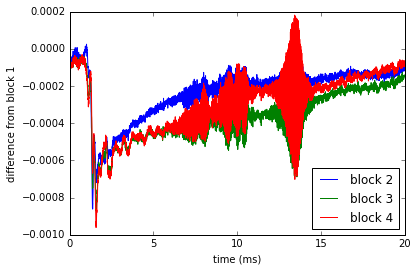

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

waveforms = np.load('microphone_data.npy')
cheap, expensive = [0, 1]

def plot_blocks(microphone, waveforms):
    
    repetitions, microphones, samples = waveforms.shape
    fs = 200 #sampling rate (kHz)
    blocks = 4
    
    d = waveforms[:, microphone, :] #use data from one microphone (reps x time)
    d.shape = (blocks, repetitions/blocks, samples) #reshape to (block x reps x time)
    d = d.mean(1) #average across each block, giving (block x time)
    d = d - d[0, :] #find the difference from the first block
    d = d.T #transpose to (time x blocks) for plotting
    
    time = [float(x)/fs for x in range(samples)]
    plt.plot(time, d[:, 1:])
    plt.xlabel('time (ms)')
    plt.ylabel('difference from block 1')
    plt.legend(['block 2', 'block 3', 'block 4'], loc=4)

plot_blocks(cheap, waveforms)

Problem 4: Repeat this for the expensive microphone. Note how there is no variability in the signal. That's what the $5,000 is paying for (among other things which we can look at in a future lecture).

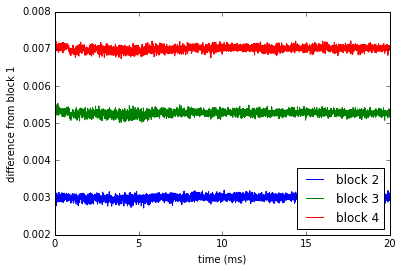

In [53]:
plot_blocks(expensive, waveforms)